In [1]:
import os
import sys
import inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from wordEmbedders import Word2Vec, AverageClassifier
from functions import dirs, readSet, saveSet
tqdm.pandas()

In [8]:
datasets = dirs('../data')
#datasets = ['AirlineTweets2']

In [3]:
embedder = Word2Vec
classifier = AverageClassifier

In [4]:
sizes = [100, 75, 50, 25, 10]

In [5]:
positiveWords = readSet('../wordlists/positiveWords.txt')
negativeWords = readSet('../wordlists/negativeWords.txt')

In [10]:
for dataset in tqdm(datasets, desc="Datasets"):
    dataFile   = f'../data/{dataset}/Data-Cleaned.csv'
    outputFile = f'./data/{dataset}/Predictions.txt'

    if not os.path.exists(dataFile):
        raise ValueError(f'Dataset {dataset} has not been cleaned')
    df = pd.read_csv(dataFile)

    out = []
    for size in sizes:
        if size == 100:
            modelFile = f'../models/{dataset}/{embedder.name}.model'
        else:
            modelFile = f'./models/{dataset}/{embedder.name}-{size}.model'

        if not os.path.exists(modelFile):
            raise ValueError(f'Dataset {dataset} has no {embedder} of size {size} trained')

        model = embedder.load(modelFile)
        clas = classifier(model, positiveWords, negativeWords, None, None)
        data = df.sample(frac=size/100, random_state=1)
        result = clas.predict(data)
        out.append(str(result.balancedAccuracy))
    saveSet(outputFile, out)

Datasets:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/8897 [00:00<?, ?it/s]

  0%|          | 0/6673 [00:00<?, ?it/s]

  0%|          | 0/4448 [00:00<?, ?it/s]

  0%|          | 0/2224 [00:00<?, ?it/s]

  0%|          | 0/890 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/37500 [00:00<?, ?it/s]

  0%|          | 0/25000 [00:00<?, ?it/s]

  0%|          | 0/12500 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/1600000 [00:00<?, ?it/s]

  0%|          | 0/1200000 [00:00<?, ?it/s]

  0%|          | 0/800000 [00:00<?, ?it/s]

  0%|          | 0/400000 [00:00<?, ?it/s]

  0%|          | 0/160000 [00:00<?, ?it/s]

In [46]:
pickle.dump((full, partial), open('./results.pickle', mode='wb'))

In [40]:
def plot(path, x, y, title, label):
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.invert_xaxis()
    ax.set_title(title)
    ax.set_xlabel('% size')
    ax.set_ylabel(label)
    fig.patch.set_alpha(1)
    fig.savefig(path)

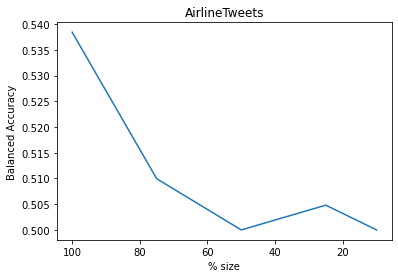

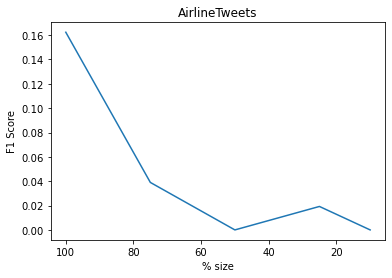

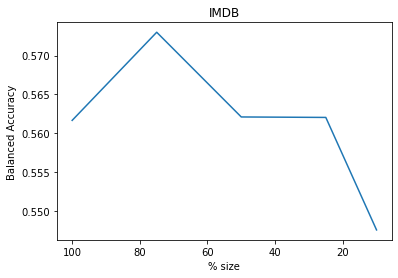

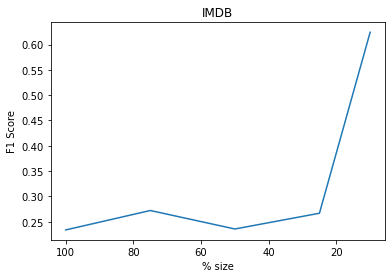

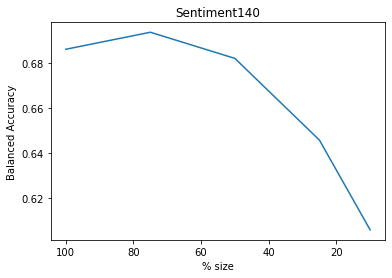

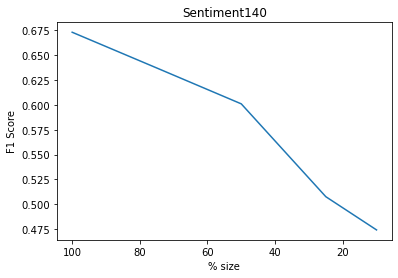

In [47]:
for (dataset, results) in full:
    sizes = []
    accuracy = []
    f1 = []
    for (size, result) in results:
        sizes.append(size)
        accuracy.append(result.balancedAccuracy)
        f1.append(result.f1Score)
    plot(f'./plots-full/{dataset}-Accuracy.png', sizes, accuracy, dataset, 'Balanced Accuracy')
    plot(f'./plots-full/{dataset}-F1.png', sizes, f1, dataset, 'F1 Score')

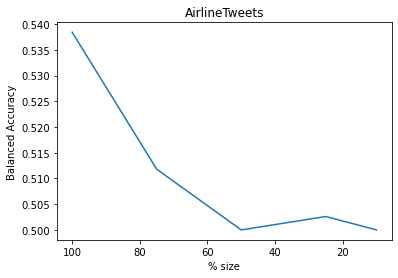

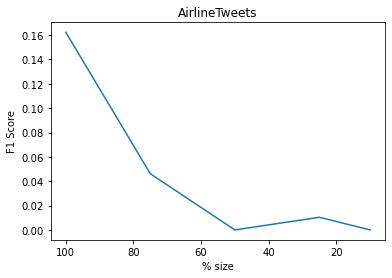

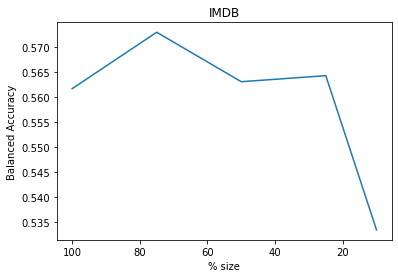

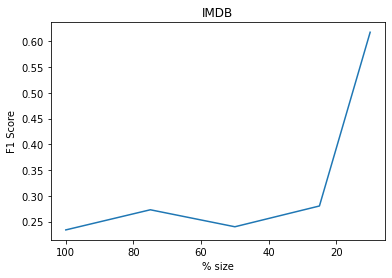

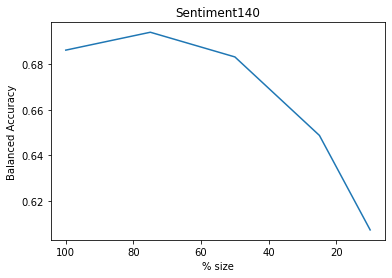

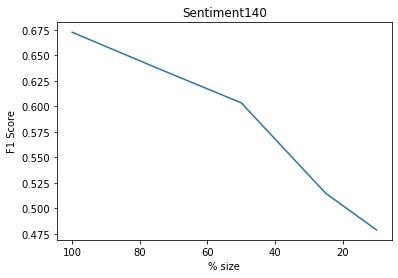

In [48]:
for (dataset, results) in partial:
    sizes = []
    accuracy = []
    f1 = []
    for (size, result) in results:
        sizes.append(size)
        accuracy.append(result.balancedAccuracy)
        f1.append(result.f1Score)
    plot(f'./plots-partial/{dataset}-Accuracy.png', sizes, accuracy, dataset, 'Balanced Accuracy')
    plot(f'./plots-partial/{dataset}-F1.png', sizes, f1, dataset, 'F1 Score')